# First Order System
현재 시간의 상태가 이전 시간의 상태와 관련이 있다고 가정    

## 이전 시간의 상태만 입력으로
> Autonomous System이라고도 하며, 외부 입력 없이 자기 혼자서 돌아가는 특징이 있습니다.

수식은 아래와 같다.
$$
x_t = f(x_{t-1})
$$
- $x$ : 상태
- $t$ : 시간
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태

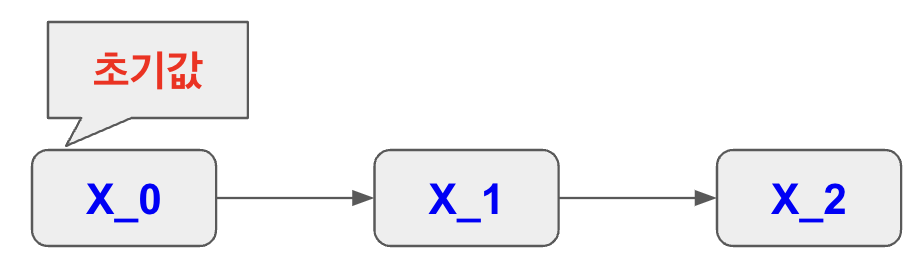

## 이전 시간의 상태와 현재 값을 입력으로
수식은 아래와 같다.
$$
x_t = f(x_{t-1},u_t)
$$
- $x$ : 상태
- $t$ : 시간
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태

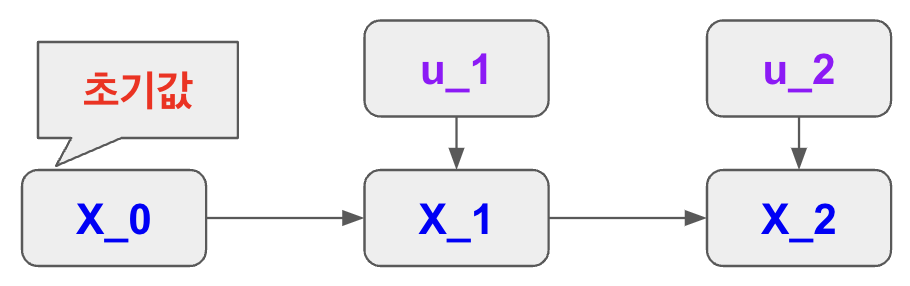

# State-Space Model
- 1차원 시스템의 모형(First Order System):     
$$
x_t = f(x_{t-1}, u_t)
$$
- 각 시간에서 관측 가능한 상태($x_t$)의 모음: 출력 $y_t$
$$
y_t = h(x_t)
$$

- $x$ : 상태(hidden layer의 state)
- $t$ : 시간
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태
- $y_t$: t시간일 때의 출력 값

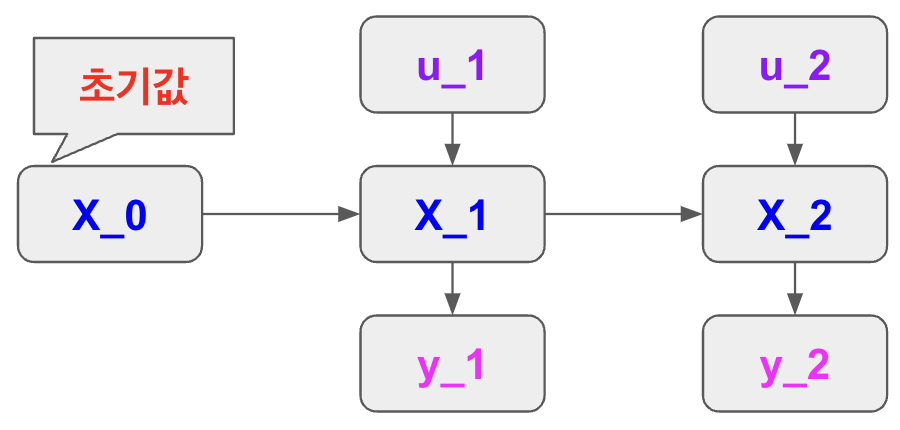

# [RNN(Recurrent Neural Networks)](https://ko.wikipedia.org/wiki/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D)
- RNN이란 Recurrent Neural Networks의 약자로, 순환 신경망을 뜻합니다. 순환 신경망이라는 이름은 입력받는 신호의 길이가 한정되지 않은 동적 데이터를 처리한다는 점에서 붙여진 이름입니다.    

CNN vs RNN
- CNN은 이미지 구역별로 같은 weight를 공유한다.
- RNN은 시간별 같은 weight를 공유한다.

## RNN 특징
- $h_t$는 t일 때의 hidden layer 상태를 나타낸다.
- $h_t$는 이전까지의 상태($h_{0}, h_{t-1}$)와 이전까지의 입력($x_{t-1}, x_t$)을 대표할 수 있는 압축본이라고 할 수 있습니다.

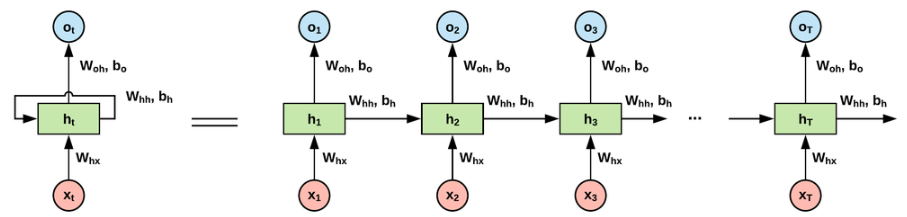

### layer가 추가된 RNN 모델

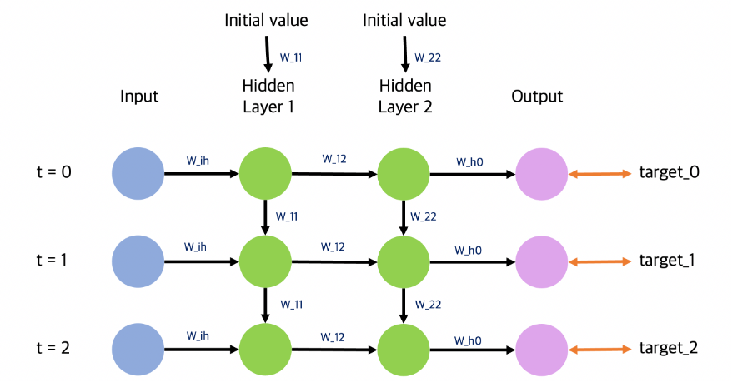

### layer와 hidden units가 추가된 RNN 모델

- 파랑색 축: layer
- 초록색 축: 시간(t)
- 빨강색 축: hidden units

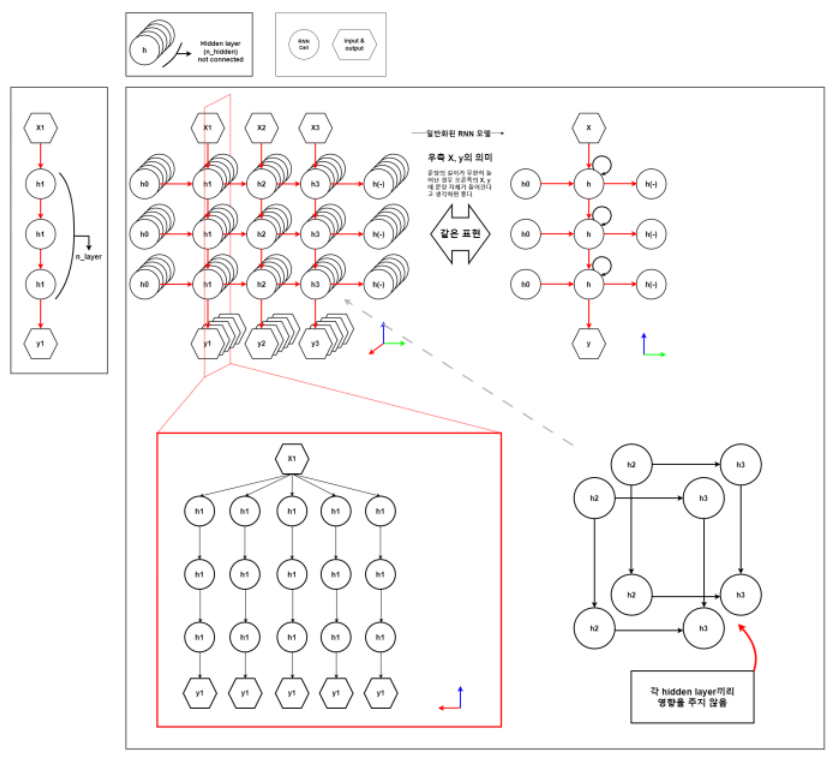

### embedding vector가 추가된 RNN 모델

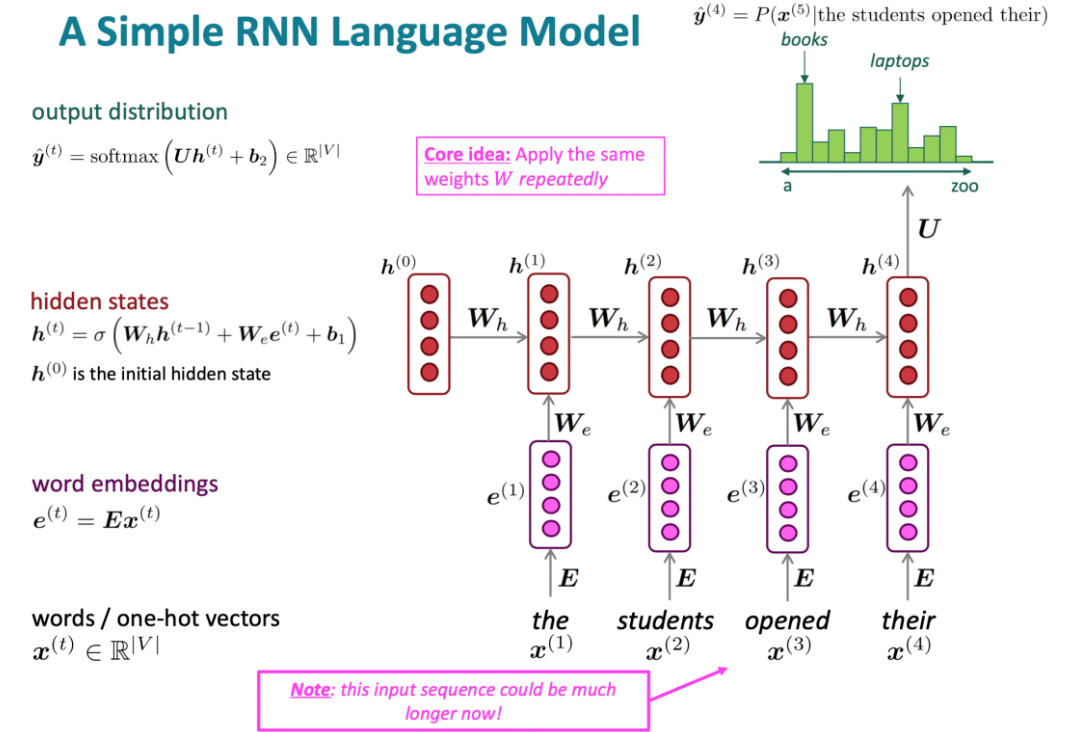

### Bi-directional RNNs

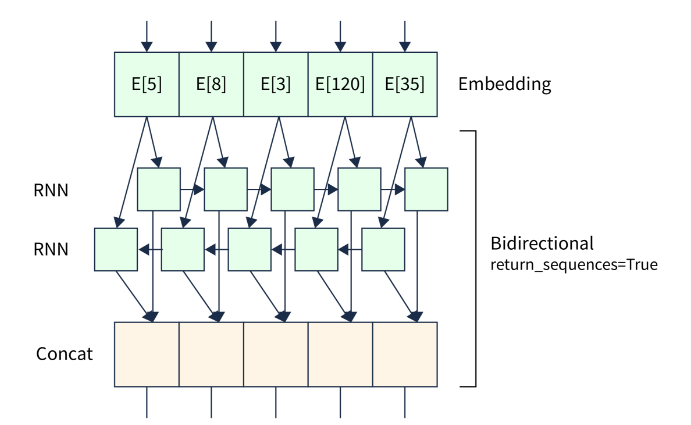

### Back propagation in RNN

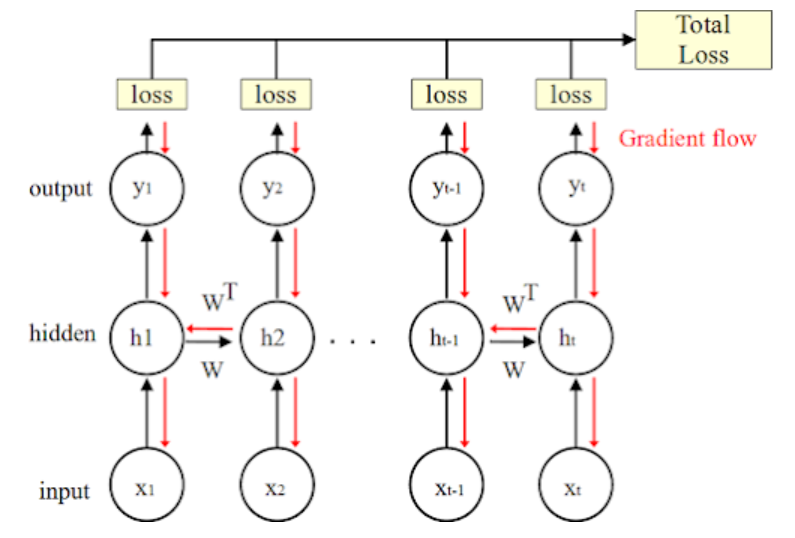

## RNN 구조 종류

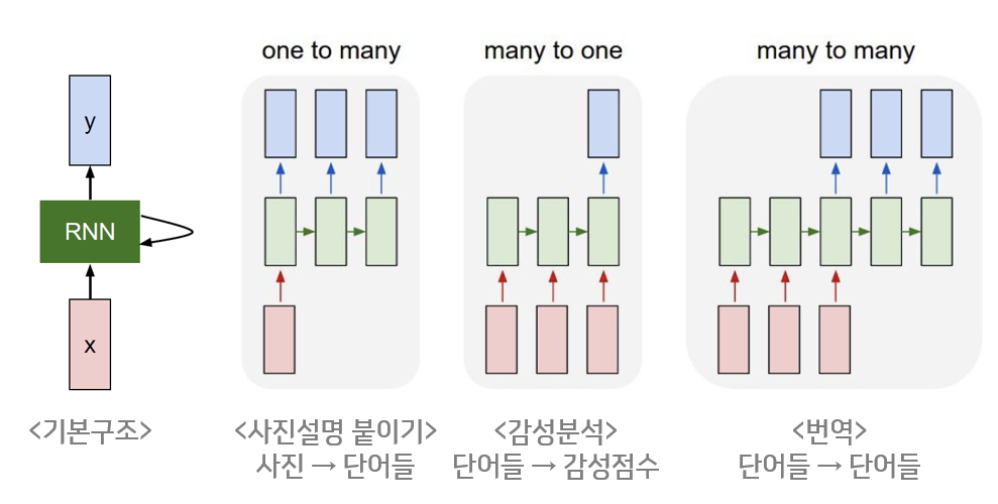

## [RNN 연산](https://wikidocs.net/22886)

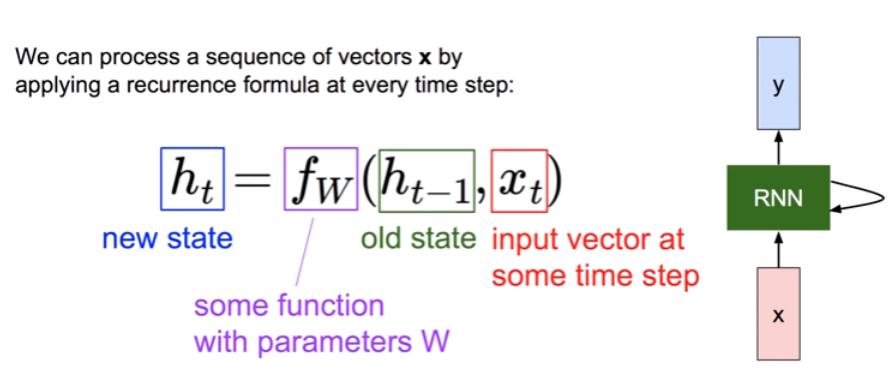

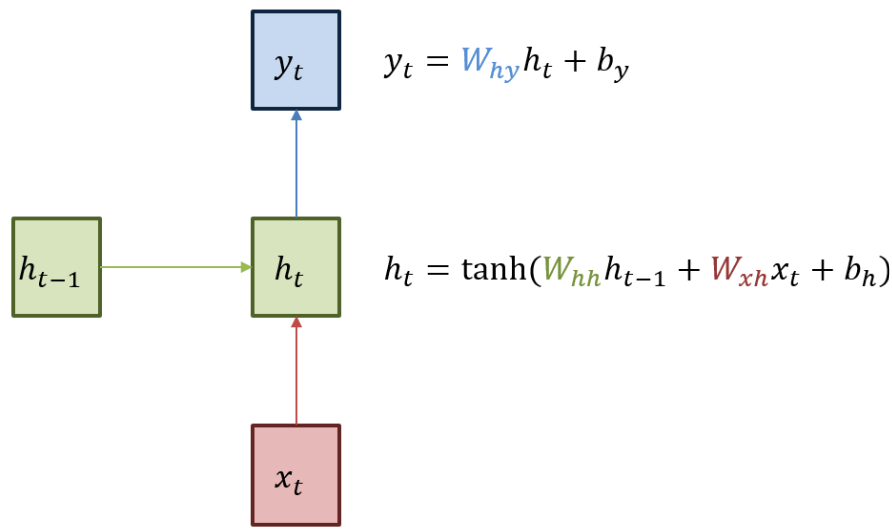

- 현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은  $h_t$를 계산하기 위해서 총 두 개의 가중치를 가집니다.
- 하나는 입력층을 위한 가중치 $W_{hx}$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_{hh}$입니다.

이를 식으로 표현하면 다음과 같습니다.
- 은닉층: $h_t = tanh(W_{hx} x_t + W_{hh} h_{t-1} + b)$
- 출력층: $y_t = f(W_y h_t +b)$
  - f()는 activate function

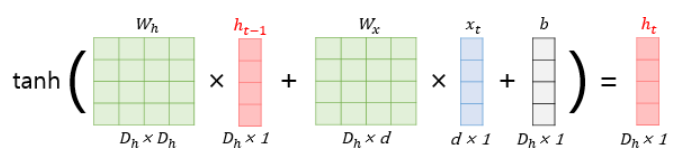

### 은닉층

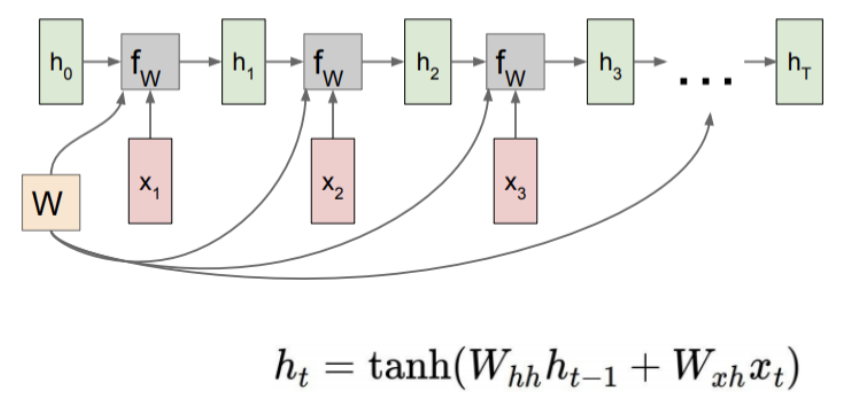

### 출력층

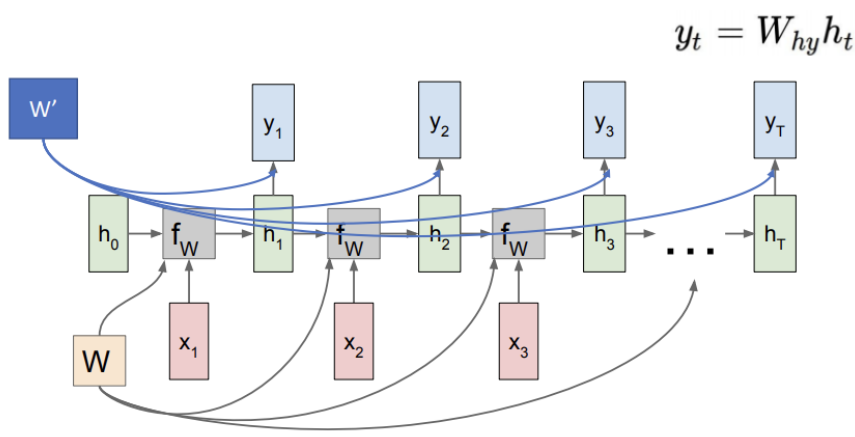

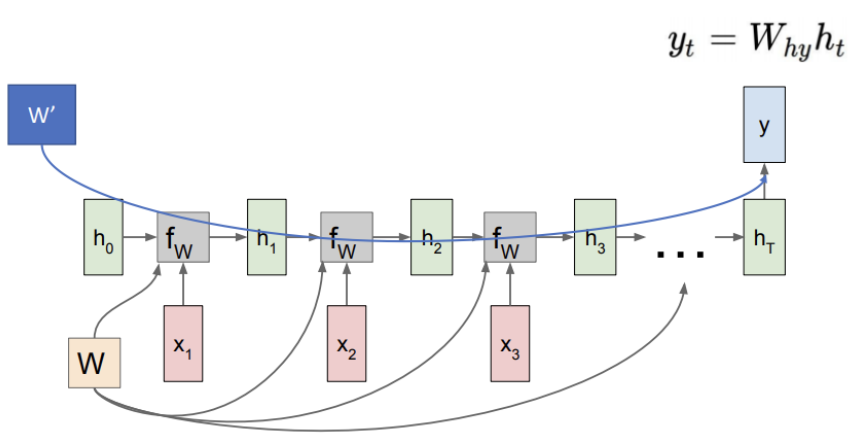

# [torchtext ImportError in colab](https://stackoverflow.com/questions/65575871/torchtext-importerror-in-colab)

In [1]:
!pip install -U torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

# [RNN V1](https://colab.research.google.com/github/graykode/nlp-tutorial/blob/master/3-1.TextRNN/TextRNN.ipynb)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Data

In [ ]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences

['i like dog', 'i love coffee', 'i hate milk']

## Vocab
1. 토큰화(문장의 의미있는 단위로 나눔)
2. 토큰의 수
3. 토큰 -> index
4. index -> 토큰

In [ ]:
class Vocab:
  def __init__(self, sentences):
    ###############################################
    # 토큰화
    # -> 문장들을 의미있는 토큰으로 구분
    ###############################################
    _word_list = " ".join(sentences).split()

    ###############################################
    # 어휘집 생성
    ###############################################
    # 토큰에 대한 중복 제거
    _word_list = list(set(_word_list))
    # 토큰의 수
    self._len_word = len(_word_list)
    # 토큰 -> index
    self.word_dict = {w: i for i, w in enumerate(_word_list)}
    # index -> 토큰
    self.number_dict = {i: w for i, w in enumerate(_word_list)}

  def to_number(self, p_str):
    return self.word_dict[p_str]

  def to_word(self, p_int):
    return self.number_dict[p_int]

  def __len__(self):
    return self._len_word

In [ ]:
sentences

['i like dog', 'i love coffee', 'i hate milk']

In [ ]:
vocab = Vocab(sentences)

In [ ]:
vocab.to_number("i")

3

In [ ]:
vocab.to_word(2)

'like'

In [ ]:
len(vocab)

7

## Dataset

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class DatasetVer1(Dataset):

  def __init__(self, sentences):
    super().__init__()
    # 1. 어휘집 생성(전체 토큰 수, 토큰를 숫자로 변경하는 기능, 숫자를 토큰로 변경하는 기능)
    self.vocab = Vocab(sentences)
    self.n_class = len(vocab) # 전체 토큰 수
    # 2. 원핫 인코딩 메트릭스 생성
    # np.eye() -> 단위행렬을 만드는 함수
    # -> 원핫 인코딩을 통해 토큰을 임베딩 처리할 메트릭스 생성
    self.one_hot_mat = np.eye(self.n_class)
    # 3. features와 target 생성
    self.features, self.targets = self.__create_data(sentences)

  def __create_data(self, sentences):
    # 초기 변수 선언
    features = []
    targets = []

    # 문장들을 돌면서 각각의 문장을 features/targets으로 변환
    for sentence in sentences:
      # tokenizer(토큰화)
      # sentence -> 철수는 영희를 좋아합니다.
      # tokens -> [철수는, 영희를, 좋아합니다.]
      tokens = sentence.split()

      # create feature & target
      # feature_indexs -> [철수는, 영희를] -> [1, 2]
      feature_indexs = [ self.vocab.to_number(word) for word in tokens[:-1] ] # featuer
      # target_index -> [좋아합니다.] -> 3
      target_index = self.vocab.to_number(tokens[-1]) # target

      # embedding(feature_indexs) -> tokens to vectors
      # -> feature만 embedding 진행 o / target embedding 진행 x
      # self.__to_embedding(feature_indexs) -> 2차원(문장의 길이(input_size), embedding_size))
      # features -> 3차원(문장의 수, 문장의 길이(input_size), embedding_size))
      features.append(self.__to_embedding(feature_indexs))
      # targets -> vector
      targets.append(target_index)
    return torch.FloatTensor(features), torch.LongTensor(targets)

  # __to_embedding(vector) -> matrix
  def __to_embedding(self, indexs):
    return self.one_hot_mat[indexs]

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.targets[idx]

In [ ]:
dt = DatasetVer1(sentences)

<ipython-input-13-91fd388a625f>:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.FloatTensor(features), torch.LongTensor(targets)


In [ ]:
features, target = dt[0]
features, target

(tensor([[0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.]]),
 tensor(0))

In [ ]:
# (sen_size, embedding_size)
features.shape

torch.Size([2, 7])

## DataLoader

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
dl = DataLoader(dt, batch_size=3, shuffle=True)

In [ ]:
len(dl)

1

In [ ]:
features, targets = next(iter(dl))

# features.shape -> (batch_size, sen_size, embedding_size)
features.shape, targets.shape

(torch.Size([3, 2, 7]), torch.Size([3]))

In [ ]:
features

tensor([[[0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.]],

        [[0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.]],

        [[0., 0., 0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.]]])

In [ ]:
targets

tensor([6, 5, 1])

## [RNN Model](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

In [ ]:
class TextRNN1(nn.Module):
    def __init__(self, n_class, n_hidden=5, n_layer=3, is_bidirection=True):
        super().__init__()
        # 변수 정의
        # 각 layer에 정의된 RNN 모델 수
        self.n_hidden = n_hidden
        self.n_layer = n_layer
        # RNN 학습 방향
        self.is_bidirection = is_bidirection
        # 레이어 정의
        self.rnn = nn.RNN(
            input_size=n_class,
            hidden_size=self.n_hidden,
            num_layers=self.n_layer,
            bidirectional=self.is_bidirection)

        # Linear(input=RNN의 hidden size, output=len(vacab))
        self.linear = nn.Linear(self.n_hidden, n_class)

    def forward(self, X): # (batch_size, input_size, embedding_size)
        # 초기값 생성 (n_direction * n_layer, batch_size, n_hidden)
        if self.is_bidirection:
            init_hidden = torch.zeros(2*self.n_layer, X.shape[0], self.n_hidden)
        else:
            init_hidden = torch.zeros(1*self.n_layer, X.shape[0], self.n_hidden)

        _input = X.transpose(0, 1) # (input_size, batch_size, embedding_size)
        # _outputs: (input_size, batch_size, n_hidden)
        # _hiddens: (n_direction * n_layer, batch_size, n_hidden)
        _outputs, _hiddens = self.rnn(_input, init_hidden)
        # _hiddens[-1]: (batch_size, n_hidden)
        _hidden = _hiddens[-1] # 마지막 데이터만 사용
        # pred: (batch_size, n_class)
        pred = self.linear(_hidden)
        return pred


### 디버깅

- init()

In [ ]:
# layer별 RNN 모델의 수 -> 예측값과 hidden의 마지막 차원의 크기
n_hidden = 5
# RNN 모델의 layer 수 -> hidden의 첫번째 차원의 크기에 영향을 줌 (directions * layer number)
n_layer = 3
# RNN의 학습 방향 -> hidden의 첫번째 차원의 크기에 영향을 줌 (directions * layer number)
is_bidirection = True # False
n_class = dt.n_class # 토큰의 전체 수 (어휘집의 토큰 수)

In [ ]:
rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden, num_layers=n_layer, bidirectional=is_bidirection)
rnn

RNN(7, 5, num_layers=3, bidirectional=True)

In [ ]:
linear = nn.Linear(n_hidden, n_class)
linear

Linear(in_features=5, out_features=7, bias=True)

- forward()

In [ ]:
# features.shape -> (batch_size, sen_size, embedding_size)
features.shape

torch.Size([3, 2, 7])

In [ ]:
if is_bidirection:
    init_hidden = torch.zeros(2*n_layer, features.shape[0], n_hidden)
else:
    init_hidden = torch.zeros(1*n_layer, features.shape[0], n_hidden)

# RNN의 hidden 초기값 정의
# -> (direction * n_layer, batch_size, n_hidden(RNN 모델의 수))
init_hidden.shape

torch.Size([6, 3, 5])

In [ ]:
# -> (sen_size, batch_size, embedding_size)
_input = features.transpose(0, 1)
_input.shape

torch.Size([2, 3, 7])

In [ ]:
_outputs, _hiddens = rnn(_input, init_hidden)

In [ ]:
# _outputs.shape -> (sen_size, batch_size, n_hidden(RNN 모델의 수))
_outputs.shape

torch.Size([2, 3, 10])

In [ ]:
# _hiddens.shape -> (direction*layer, batch_size, n_hidden(RNN 모델의 수))
_hiddens.shape

torch.Size([6, 3, 5])

In [ ]:
# (batch_size, n_hidden(RNN 모델의 수))
_hiddens[-1].shape

torch.Size([3, 5])

In [ ]:
pred = linear(_hiddens[-1])

# (batch_size, len(vacab))
pred.shape

torch.Size([3, 7])

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
pred.shape, targets.shape

(torch.Size([3, 7]), torch.Size([3]))

In [ ]:
criterion(pred, targets)

tensor(1.8715, grad_fn=<NllLossBackward0>)

## Training

In [ ]:
def train_step(p_model, p_loss_fn, p_optimizer, p_dl):
    epoch_loss = 0

    for features, targets in p_dl:
        pred = p_model(features)

        loss = p_loss_fn(pred, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(p_dl)

In [ ]:
dt = DatasetVer1(sentences)
dl = DataLoader(dt, batch_size=3, shuffle=True)

model = TextRNN1(dt.n_class)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epoch = 5000
for epoch in range(n_epoch):
    epoch_loss = train_step(model, criterion, optimizer, dl)

    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(epoch_loss))

Epoch: 1000 cost = 0.105754
Epoch: 2000 cost = 0.037402
Epoch: 3000 cost = 0.017949
Epoch: 4000 cost = 0.009721
Epoch: 5000 cost = 0.005585


## Predict

In [ ]:
predict_features, predict_target = dt[0]
predict_features.shape # (input_size, embedding_size)

torch.Size([2, 7])

In [ ]:
predict_features = torch.unsqueeze(predict_features, 0)
predict_features.shape # (batch_size, input_size, embedding_size)

torch.Size([1, 2, 7])

In [ ]:
predict_pred = model(predict_features)
# (batch_size, predict)
predict_pred.shape

torch.Size([1, 7])

In [ ]:
predict_pred

tensor([[ 6.2639, -2.4762, -2.2622, -2.6877, -2.8440, -2.9344,  1.3324]],
       grad_fn=<AddmmBackward0>)

In [ ]:
# 예측값을 확률값으로 변경
pred_soft = predict_pred.softmax(dim=1)
pred_soft.shape

torch.Size([1, 7])

In [ ]:
pred_soft

tensor([[9.9215e-01, 1.5877e-04, 1.9667e-04, 1.2851e-04, 1.0991e-04, 1.0042e-04,
         7.1587e-03]], grad_fn=<SoftmaxBackward0>)

In [ ]:
# 확률값의 합은 항상 1이다.
pred_soft.sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [ ]:
# argmax((batch, predict)) -> (batch,)
pred_max = pred_soft.argmax(dim=1)
pred_max.shape

torch.Size([1])

In [ ]:
pred_max

tensor([0])

모델 예측과 실제값이 같음

In [ ]:
pred_max == predict_target

tensor([True])

In [ ]:
vocab.to_word(pred_max.to("cpu").numpy()[0])

'dog'

# RNN V2

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchtext.vocab import build_vocab_from_iterator

from tqdm.auto import tqdm

## [Data](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [3]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/2. Deep Learning/3. NLP Pytorch/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


In [4]:
df_en = pd.read_csv(DATA_PATH+"IMDB/IMDB-Dataset.csv")

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- 원활한 학습을 위해서 데이터량을 5000개로 줄임;;;

In [5]:
df_en = df_en[:5000]
print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Text Preprocessing

### Cleaning(정제)

In [6]:
df_en['sentiment'] = df_en['sentiment'].map({'positive':1, 'negative':0})

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
df_en['review'] = df_en['review'].map(lambda x: x.strip())
df_en['review'] = df_en['review'].map(lambda x: x.lower())

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [8]:
df_en['review'] = df_en['review'].map(lambda x: x.replace('<br />',''))

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [9]:
df_en.tail()

,review,sentiment
4995,an interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,1
4997,once again jet li brings his charismatic prese...,1
4998,"i rented this movie, after hearing chris gore ...",0
4999,this was a big disappointment for me. i think ...,0


### [Tokenization(토큰화)](https://spacy.io/models/en)

In [10]:
import spacy # 형태소 분석기

In [11]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
nlp = spacy.load("en_core_web_sm") # 형태소 분석기 객체 생성

### Stemming(추출) / Stopword(불용어)

In [13]:
def tokenizer(text):
    doc = nlp(text)
    return [ token.lemma_ for token in doc if token.tag_[0] in "NVJ"] # N(명사), V(동사), J(형용사)


In [14]:
def yield_tokens(data, tokenizer):
    for text in tqdm(data):
        yield tokenizer(text)

### 어휘집 생성
- `<pad>(패딩)`: 0
- `<unk>(정의되지 않은 문자)`: 1

In [15]:
gen = yield_tokens(df_en["review"],tokenizer)
vocab = build_vocab_from_iterator(gen, specials=["<pad>","<unk>"])
vocab.set_default_index(vocab["<unk>"])
len(vocab)

  0%|          | 0/5000 [00:00<?, ?it/s]

35875

In [16]:
vocab(["watching","other","reviewer"])

[5272, 19, 862]

In [17]:
vocab.lookup_tokens([5274, 19, 864, 1, 0])

['welch', 'other', 'sick', '<unk>', '<pad>']

In [18]:
features = [ vocab(tokenizer(text)) for text in tqdm(df_en["review"].tolist())]
len(features)

  0%|          | 0/5000 [00:00<?, ?it/s]

5000

### Padding

- 최대 문장길이

In [19]:
max_len = max(len(lst) for lst in features)
max_len

913

- 패딩 적용

In [20]:
features = [ lst + [0] * (max_len - len(lst))  if len(lst) < max_len else lst for lst in features]
features = np.array(features)
features.shape

(5000, 913)

## Dataset

In [21]:
from torch.utils.data import Dataset

In [22]:
target = df_en["sentiment"].to_numpy()
target.shape

(5000,)

In [23]:
target = target.reshape(-1,1)
target.shape

(5000, 1)

In [24]:
class ReviewDataset(Dataset):
    def __init__(self,features, target=None):
        self.x = features # features
        self.y = target # target

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self,idx):
        item = {}
        # torch.LongTensor(feature)로 형변환 한 이유
        # -> embedding model은 정수(LongTensor)를 input으로 받기 때문에 정수로 형변환
        item["x"] = torch.LongTensor(self.x[idx])
        if self.y is not None:
            # torch.Tensor(target)로 형변환한 이유
            # -> loss function에 사용하며, 모델의 예측값(실수)과 차이를 계산하기 위해서 실수로 형변환
            item["y"] = torch.Tensor(self.y[idx])
        return item

In [25]:
dt = ReviewDataset(features,target)

In [26]:
# len(dt) -> 리뷰 데이터의 수(문장의 수)
len(dt)

5000

In [27]:
# len(dt[0]['x']) -> 토큰의 수(하나의 문장에 포함 된)
# -> 리뷰 데이터 중 가장 킨 문장의 토큰 수
len(dt[0]['x']), len(dt[0]['y'])

(913, 1)

In [28]:
# 토큰 -> 문장에서 가장 의미있는 단위로 나눔 -> 어휘집을 통해 숫자(index)로 표현
# -> 마지막 숫자들은 0(padding)으로 채워짐
#    -> 각각의 문장의 길이를 통일 시키기 위해서 padding을 추가함
dt[0]['x']

tensor([   19,   862,     3,   282,    13,  2394,   152,     2,  1087,     2,
          192,     2,   102, 10258,    45,    32,   961,     2,  6164, 17432,
           18,   398,    92,   192,   193,    12,  1305,     2,    20,  6872,
         1556, 10750,    20,   405,  1534,   778,   391,   266,   398,     2,
         2658,   208,    53,     2,   117,     2,  7105,    29,  6450,  3394,
         2128,   529, 29669,   493,  8541,   346,  4494,  1945,   935,  1650,
            3,  1778,   710,   160, 15352, 12600,     2,   143,  4198,   346,
            2,   305,    44,  8272,  2943,  9914, 10168,  6179,   743,  2014,
           36,   973, 12810,   211,  1837,  4252,  5775,  9138,  6668,     2,
        19061,    24,   155,   857,    20,     2,  1162,    90,    12,    19,
           20,  1584,   352,   809,   238,  1213,  2214,   127,   352,   983,
          352,   513,  2394,     6,   600,    45,   152,     7,   961,  1103,
            2,  1839,    24,     2,  1105,    13,   501,   850, 

## DataLoader

In [29]:
from torch.utils.data import DataLoader

In [30]:
dl = DataLoader(dt,batch_size=256,shuffle=True)

In [31]:
len(dl) # 5000 / 256 -> 전체 데이터를 / 베치 크기

20

In [32]:
batch = next(iter(dl))
batch['x'][:2], batch['y'][:2]

(tensor([[ 24, 112,  64,  ...,   0,   0,   0],
         [  3,   3, 368,  ...,   0,   0,   0]]),
 tensor([[1.],
         [0.]]))

## RNN Model

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
class TextRNN2(nn.Module):
  def __init__(self,
               # Model
               device,
               ###########################
               # Embedding Layer
               ###########################
               # Embedding Model input size
               # -> 어휘집에 등록된 토큰의 수
               size_vocab=500,
               # Embedding Model output size
               # -> 각 토큰을 설명할 vector의 size
               #    -> 각 토큰별 상관관계를 표현한 데이터
               dim_embed=64,
               ###########################
               # RNN Layer
               ###########################
               # hidden_size -> layer별 RNN Model의 수
               # -> 해당값이 변경된다면, RNN의 ouput과 RNN 초기값이 변경됨
               # -> 첫번째 FC Layer input size와 같음
               hidden_size=64,
               # layer의 수
               # -> 해당값이 변경된다면, RNN 초기값이 변경됨
               num_layers=1,
               # RNN Model의 학습 방향
               # -> 해당값이 변경된다면, RNN 초기값이 변경됨
               is_bidirection=False,
               ###########################
               # FC Layer
               ###########################
               # 두번째 FC Layer의 input size
               # -> 첫밴째 FC Layer의 ouput size
               linear_size=64,
               # target size와 같음
               num_output=1
               ):
    super().__init__()
    self.device = device
    self.num_output = num_output
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.is_bidirection = is_bidirection

    self.embed = nn.Embedding(size_vocab, dim_embed)
    self.rnn = nn.RNN(input_size=dim_embed, hidden_size=self.hidden_size, num_layers=self.num_layers, bidirectional=self.is_bidirection)

    self.fclayer = nn.Linear(hidden_size, linear_size)
    self.outlayer = nn.Linear(linear_size, num_output)

  def forward(self, x): # (batch, seq_len)
    n_direction = 2 if self.is_bidirection == True else 1 # Bi-RNN(2), RNN(1)
    # 초기값 생성 = n_direction * num_layers, batch_size, n_hidden
    init_hidden = torch.zeros(n_direction*self.num_layers, x.shape[0], self.hidden_size)

    # emb -> (batch, seq_len, dim_embed)
    emb = self.embed(x)
    # _emb -> (seq_len, batch, dim_embed)
    _emb = emb.transpose(1,0)
    out, hidden_state = self.rnn(_emb, init_hidden)

    # h_out -> (batch, n_hidden)
    h_out = hidden_state[-1] # 마지막 hidden 값만 사용

    # fc_out -> (batch, linear_size)
    fc_out = self.fclayer(h_out).relu()
    # predict -> (batch, target_size)
    predict = self.outlayer(fc_out)
    return predict

### 모델 구조

In [5]:
model = TextRNN2(device='cpu', size_vocab=913).to('cpu')
model

TextRNN2(
  (embed): Embedding(913, 64)
  (rnn): RNN(64, 64)
  (fclayer): Linear(in_features=64, out_features=64, bias=True)
  (outlayer): Linear(in_features=64, out_features=1, bias=True)
)

In [6]:
!pip install torchinfo

In [7]:
import torchinfo

In [8]:
# # forward함수 print 정보
torchinfo.summary(
    model,
    (256,48), # (batch_size, max_len)
    dtypes=[torch.long], # input data type이 정수인 경우에는 torch.long으로 정의해야 함
    col_width=16,
    col_names=["input_size", "output_size", "num_params"])

Layer (type:depth-idx)                   Input Shape      Output Shape     Param #
TextRNN2                                 [256, 48]        [256, 1]         --
├─Embedding: 1-1                         [256, 48]        [256, 48, 64]    58,432
├─RNN: 1-2                               [48, 256, 64]    [48, 256, 64]    8,320
├─Linear: 1-3                            [256, 64]        [256, 64]        4,160
├─Linear: 1-4                            [256, 64]        [256, 1]         65
Total params: 70,977
Trainable params: 70,977
Non-trainable params: 0
Total mult-adds (M): 118.28
Input size (MB): 0.10
Forward/backward pass size (MB): 12.72
Params size (MB): 0.28
Estimated Total Size (MB): 13.10

### 모델 디버깅

In [45]:
dl = DataLoader(dt,batch_size=256,shuffle=True)
batch = next(iter(dl))
features = batch['x']
target = batch['y']

# features -> (batch_size, len_sen)
features.shape, target.shape

(torch.Size([256, 913]), torch.Size([256, 1]))

#### 변수들 선언

In [43]:
# Embedding Model output size
size_vocab=len(vocab)
dim_embed=64

# RNN Layer
hidden_size=64
num_layers=1
is_bidirection=False

# FC Layer
linear_size=64
num_output=1

#### Embedding

In [44]:
embed = nn.Embedding(size_vocab, dim_embed)

In [46]:
# features -> (batch_size, len_sen)
embed_out = embed(features)
# embed_out -> (batch_size, len_sen, embedding_size)
embed_out.shape

torch.Size([256, 913, 64])

#### RNN

In [47]:
rnn = nn.RNN(input_size=dim_embed, hidden_size=hidden_size, num_layers=num_layers, bidirectional=is_bidirection)

In [48]:
n_direction = 2 if is_bidirection == True else 1 # Bi-RNN(2), RNN(1)
# 초기값 생성 = n_direction * num_layers, batch_size, n_hidden
init_hidden = torch.zeros(n_direction*num_layers, features.shape[0], hidden_size)
init_hidden.shape

torch.Size([1, 256, 64])

In [51]:
# input_rnn -> (len_sen, batch, embedding_size)
input_rnn = embed_out.transpose(1,0)
input_rnn.shape

torch.Size([913, 256, 64])

In [52]:
out_rnn, hidden_state = rnn(input_rnn, init_hidden)

In [53]:
# out_rnn -> (len_sen, batch, hidden)
out_rnn.shape

torch.Size([913, 256, 64])

In [54]:
# hidden_state -> (rediction*layer, batch, hidden)
hidden_state.shape

torch.Size([1, 256, 64])

#### FC

In [55]:
fclayer = nn.Linear(hidden_size, linear_size)
outlayer = nn.Linear(linear_size, num_output)

In [56]:
input_fc = hidden_state[-1]

# input_fc -> (batch, hidden)
input_fc.shape

torch.Size([256, 64])

In [57]:
out_fc = outlayer(fclayer(input_fc).relu())

# out_fc -> (batch, target)
out_fc.shape

torch.Size([256, 1])

## Engine

In [ ]:
def train_loop(dataloader,model,loss_fn,optimizer,device):
    epoch_loss = 0
    model.train()
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)

    return epoch_loss

In [ ]:
from sklearn.metrics import accuracy_score

@torch.inference_mode()
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    total_acc = 0
    model.eval()

    pred_list = []
    sig = torch.nn.Sigmoid()

    for batch in dataloader:

        pred = model(batch["x"].to(device))

        pred_ = sig(pred)
        pred_ = pred_.to("cpu").numpy()
        pred_list.append(pred_)

        if batch.get("y") is not None:
            loss = loss_fn(pred, batch["y"].to(device))
            epoch_loss += loss.item()

            pred_ = (pred_ > 0.5).astype(int)
            total_acc += accuracy_score(batch["y"].to("cpu").numpy(), pred_)

    epoch_loss /= len(dataloader)
    total_acc /= len(dataloader)

    # epoch_pred = np.concatenate(pred_list)
    return epoch_loss , total_acc

## KFold

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

SEED = 42
n_splits = 5
cv = KFold(n_splits=n_splits,shuffle=True, random_state=SEED)

## Training

- 성능이 좋이 않음
  - 학습할 데이터가 너무 적음
  - RNN의 한계

In [ ]:
best_score_list = []
epochs = 100
batch_size = 256 #128
vocab_size = len(vocab)

model = TextRNN2(device=device, size_vocab=vocab_size).to(device)
loss_fn = torch.nn.BCEWithLogitsLoss()

for i,(tri,vai) in enumerate(cv.split(features)):
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = ReviewDataset(features[tri],target[tri])
    valid_dt = ReviewDataset(features[vai],target[vai])
    train_dl = DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    valid_dl = DataLoader(valid_dt, batch_size=batch_size,shuffle=False)

    best_score = 0
    patience = 0

    for epoch in tqdm(range(epochs)):

        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device )
        valid_loss , score = test_loop(valid_dl, model, loss_fn, device  )

        patience += 1
        if best_score < score:
            print(f'best score: {train_loss, valid_loss, score}') # 트레인 로스, 벨리드 로스, 스코어
            patience = 0
            best_score = score
            # torch.save(model.state_dict(),f"model_{i}.pth")

        if patience == 20:
            break

    print(f"Fold ({i}), BEST ACC: {best_score}")
    best_score_list.append(best_score)

  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6941974423825741, 0.6923771947622299, 0.5305765086206897)
Fold (0), BEST ACC: 0.5305765086206897


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6942447163164616, 0.6933791637420654, 0.5007071659482758)
Fold (1), BEST ACC: 0.5007071659482758


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6945007629692554, 0.6944983303546906, 0.4959253771551724)
best score: (0.6934639513492584, 0.6931282132863998, 0.5040746228448276)


## Prediction

In [ ]:
test_dt = ReviewDataset(features,target)
test_dl = DataLoader(test_dt, batch_size=batch_size,shuffle=False)

loss , pred = test_loop(test_dl, model, loss_fn, device  )

loss, pred